In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/kaggle/input/cars-data/car.csv')
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [2]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [4]:
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

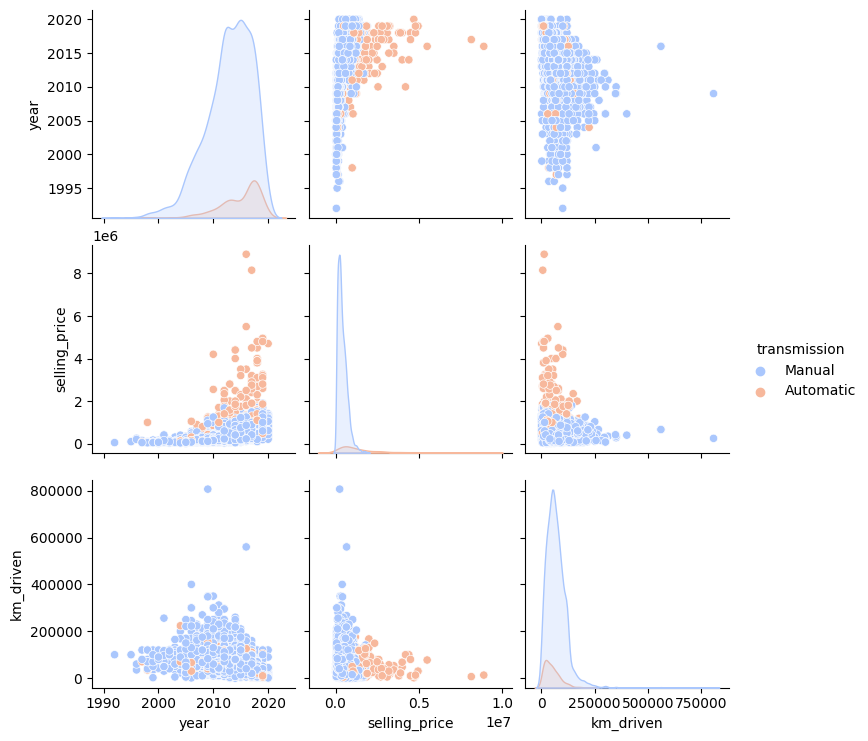

In [5]:
sns.pairplot(df, hue ="transmission", palette ='coolwarm')


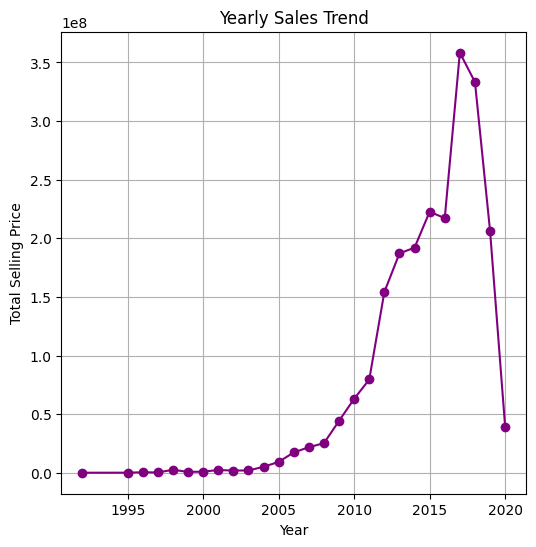

In [6]:
yearly_sales = df.groupby('year')['selling_price'].sum()

plt.figure(figsize=(6, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Total Selling Price')
plt.title('Yearly Sales Trend')
plt.grid(True)
plt.show()

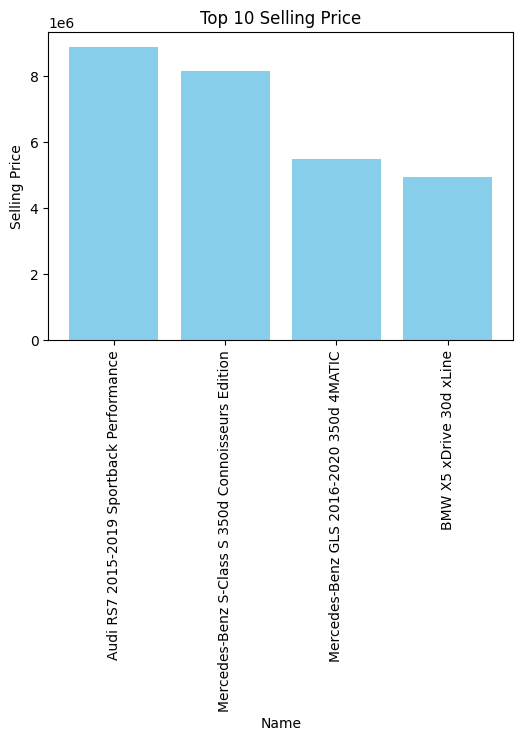

In [7]:
plt.figure(figsize=(6, 4))
plt.bar(df.sort_values(by='selling_price', ascending=False).head(10)['name'], df.sort_values(by='selling_price', ascending=False).head(10)['selling_price'], color='skyblue')
plt.xlabel('Name')
plt.ylabel('Selling Price')
plt.title('Top 10 Selling Price')
plt.xticks(rotation=90)
plt.show()

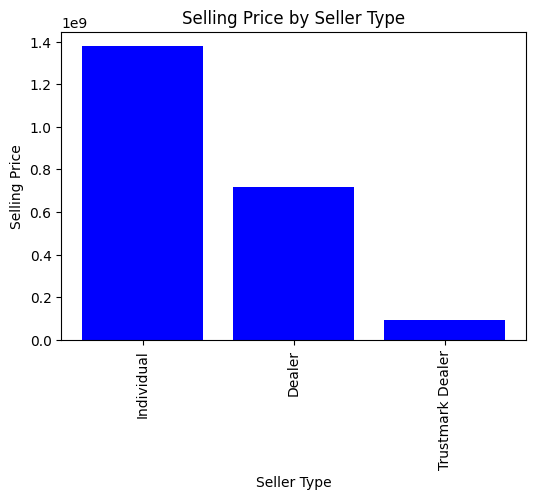

In [8]:
plt.figure(figsize=(6, 4))
plt.bar(df.groupby('seller_type')['selling_price'].sum().reset_index().sort_values(by='selling_price', ascending=False)['seller_type'], df.groupby('seller_type')['selling_price'].sum().reset_index().sort_values(by='selling_price', ascending=False)['selling_price'], color='blue')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Selling Price by Seller Type')
plt.xticks(rotation=90)
plt.show()

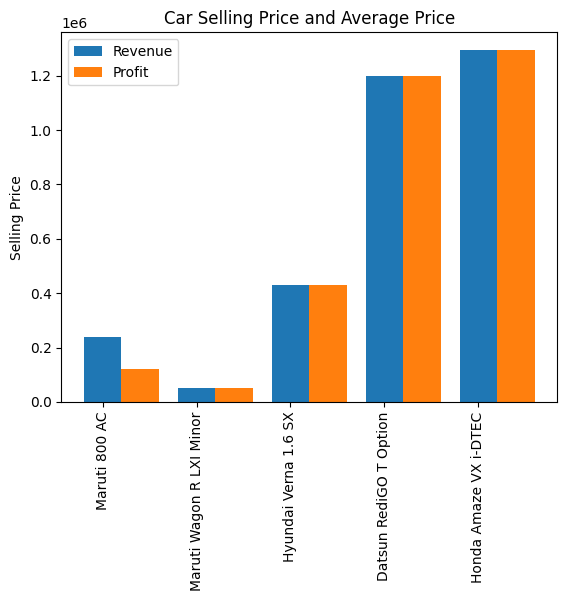

In [9]:
company = df['name'].unique()[:5]
xpos = np.arange(len(company))
revenue = df.groupby('name')['selling_price'].sum().head(5)
profit = df.groupby('name')['selling_price'].mean().head(5)

plt.bar(xpos, revenue, width=0.4, label="Revenue")
plt.bar(xpos + 0.4, profit, width=0.4, label="Profit")
plt.xticks(xpos, company)
plt.ylabel("Selling Price")
plt.title('Car Selling Price and Average Price')
plt.legend()
plt.xticks(rotation=90)
plt.show()

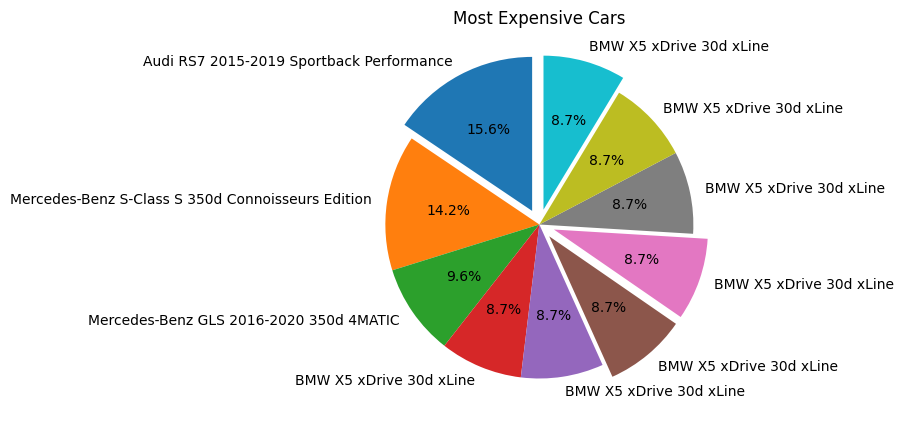

In [10]:
plt.figure(figsize=(7, 5))
plt.pie(df.sort_values(by='selling_price', ascending=False).head(10)['selling_price'], labels=df.sort_values(by='selling_price', ascending=False).head(10)['name'], autopct='%1.1f%%', startangle=90,explode=[.1,0,0,0,0,.1,.1,0,0,.1])
plt.title('Most Expensive Cars')
plt.show()

In [11]:
import plotly.express as px

fig = px.scatter(df,
                 x="selling_price",
                 animation_frame="year",
                 y="km_driven",
                 size="year",
                 color="fuel",
                 hover_name="name",
                 log_x=True,
                 size_max=30,
                 range_x=[100,100000],
                 range_y=[25,90],
                 labels={"year":"Year"}
                 )
fig.show()

In [12]:
import plotly.graph_objects as go

# Calculate the correlation matrix only for numeric columns
correlation_matrix = df.select_dtypes(include=['number']).corr()

fig = go.Figure(data=go.Heatmap(
                   z=correlation_matrix,
                   x=correlation_matrix.columns,
                   y=correlation_matrix.columns,
                   colorscale='blues',
                   colorbar=dict(title='correlation'),
                   text=correlation_matrix.round(2).values,
                   texttemplate="%{text}"))
fig.update_layout(title='Correlation Matrix')
fig.show()

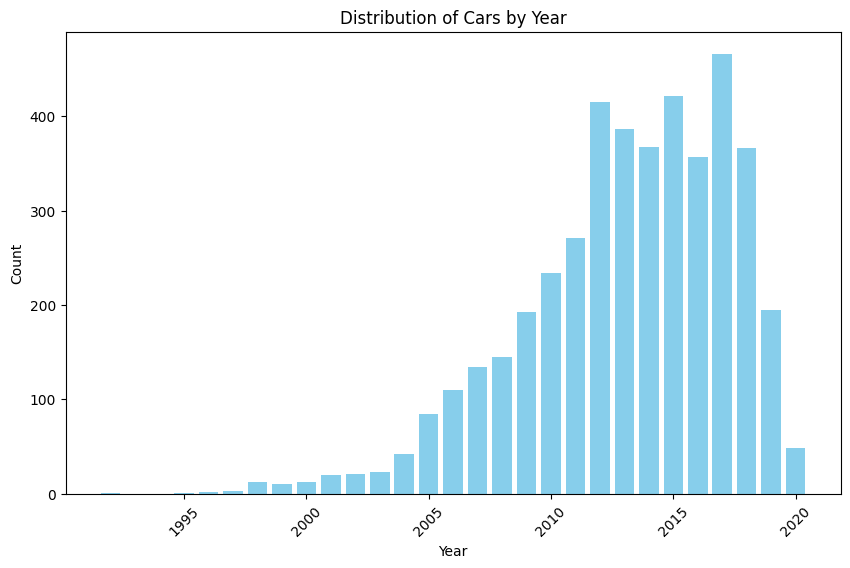

In [13]:
year_counts = df['year'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(year_counts.index, year_counts.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Distribution of Cars by Year')
plt.xticks(rotation=45)
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

X = df[['km_driven']]
y = df['selling_price']
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [15]:
reg.coef_


array([-2.38504632])

In [16]:
reg.intercept_

662055.0078537667

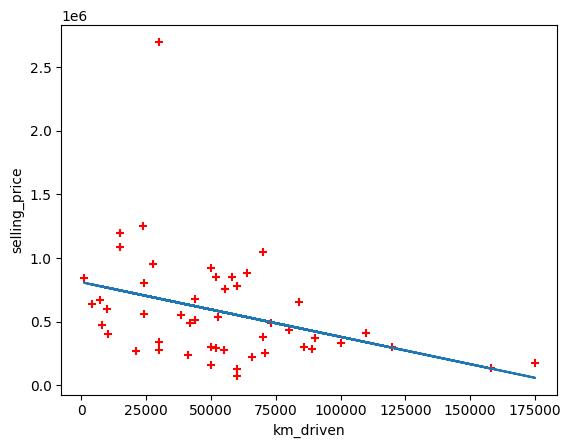

In [17]:
sample_df = df.sample(n=50)


X = sample_df[['km_driven']]
y = sample_df['selling_price']


reg = LinearRegression()
reg.fit(X, y)


plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.scatter(sample_df.km_driven, sample_df.selling_price, color='red', marker='+')
plt.plot(sample_df.km_driven, reg.predict(sample_df[['km_driven']]))